<a href="https://colab.research.google.com/github/jocelynbaduria/cmpe-297_SOTA/blob/main/AutoVimL_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ReadMe: 

Reference:

https://github.com/AutoViML/deep_autoviml/blob/master/examples/Deep_Auto_ViML_Image_Classification_Demo.ipynb

https://www.kaggle.com/alxmamaev/flowers-recognition

https://www.kaggle.com/gpiosenka/100-bird-species

https://drive.google.com/drive/folders/1b0dQDOeRx_tjpoYngEuZdnCaaJJCUFyb?usp=sharing


1. Reproduce the tutorial using  sunflower, cars, albatross bird dataset.
2. Restart after each downloading images from kaggle API downloader to /content folder to refresh the /content/train folder
3. Copy the images needed to /content/Mydrive/train folder
4. Run the tutorials, and copy the downloaded images from /content/Mydrive/train to /content/train folder.  
5. Results shows the actual and predicted label of images and training accuracy.



In [1]:
!pip install deep_autoviml -q

     |████████████████████████████████| 269 kB 5.4 MB/s 
     |████████████████████████████████| 23.2 MB 54.1 MB/s 
     |████████████████████████████████| 14.5 MB 34 kB/s 
     |████████████████████████████████| 4.4 MB 34.1 MB/s 
     |████████████████████████████████| 170 kB 49.8 MB/s 
     |████████████████████████████████| 308 kB 34.9 MB/s 
     |████████████████████████████████| 80 kB 8.4 MB/s 
     |████████████████████████████████| 209 kB 50.9 MB/s 
     |████████████████████████████████| 75 kB 4.6 MB/s 
     |████████████████████████████████| 49 kB 6.2 MB/s 
     |████████████████████████████████| 144 kB 50.9 MB/s 
     |████████████████████████████████| 111 kB 43.4 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,

In [ ]:
!pip install kaggle -q

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"jocelynbaduria","key":"c3feef55dd9992f450b5c8d0af5c642f"}'}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

### 1. Flowers Tulip

In [ ]:
!kaggle datasets download 'alxmamaev/flowers-recognition'
!unzip  flowers-recognition.zip

 97% 219M/225M [00:08<00:00, 22.0MB/s]
100% 225M/225M [00:08<00:00, 28.0MB/s]
Archive:  flowers-recognition.zip
  inflating: flowers/daisy/100080576_f52e8ee070_n.jpg  
  inflating: flowers/daisy/10140303196_b88d3d6cec.jpg  
  inflating: flowers/daisy/10172379554_b296050f82_n.jpg  
  inflating: flowers/daisy/10172567486_2748826a8b.jpg  
  inflating: flowers/daisy/10172636503_21bededa75_n.jpg  
  inflating: flowers/daisy/102841525_bd6628ae3c.jpg  
  inflating: flowers/daisy/10300722094_28fa978807_n.jpg  
  inflating: flowers/daisy/1031799732_e7f4008c03.jpg  
  inflating: flowers/daisy/10391248763_1d16681106_n.jpg  
  inflating: flowers/daisy/10437754174_22ec990b77_m.jpg  
  inflating: flowers/daisy/10437770546_8bb6f7bdd3_m.jpg  
  inflating: flowers/daisy/10437929963_bc13eebe0c.jpg  
  inflating: flowers/daisy/10466290366_cc72e33532.jpg  
  inflating: flowers/daisy/10466558316_a7198b87e2.jpg  
  inflating: flowers/daisy/10555749515_13a12a026e.jpg  
  inflating: flowers/daisy/10555815624_

In [ ]:
!mv /content/flowers/tulip /content/train

In [ ]:
from deep_autoviml import deep_autoviml as deepauto
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf


Imported deep_auto_viml. version=0.0.67
from deep_autoviml import deep_autoviml as deepauto
-------------------
model, cat_vocab_dict = deepauto.fit(train, target, keras_model_type="fast",
		project_name="deep_autoviml", keras_options=keras_options,  
		model_options=model_options, save_model_flag=True, use_my_model='',
		model_use_case='', verbose=0)

predictions = deepauto.predict(model, project_name, test_dataset=test,
                                 keras_model_type=keras_model_type, 
                                 cat_vocab_dict=cat_vocab_dict)
                                


In [ ]:
BATCHSIZE = 256
CLASSES = 10
EPOCHS = 25
NUM_TRIALS = 5

In [ ]:
target = 'image'
datapath = '/content/'

In [ ]:
!cp -r /content/flowers/sunflower /content/train/s

In [12]:
from PIL import Image

img = Image.open('/content/train/100930342_92e8746431_n.jpg')

In [13]:
height = 224
width = 224
img_channels = 3

In [14]:
keras_model_type =  "image" ## always try "auto" first, then "basic", "deep", "big deep", "giant deep", "cnn1" etc.
keras_options = {"early_stopping": True, 'lr_scheduler': 'rlr', "epochs": 3}  ### always set early_stopping to True first and then change it to False
model_options = {'tuner':"optuna", "max_trials":10, 'cat_feat_cross_flag':True, 
                 'image_directory': datapath, 'image_height': height, 
                 'image_width':width, 'image_channels':img_channels }
## always set the tuner to "storm" first and then "optuna"
#### You always need 15 max_trials to get something decent #####

Num GPUs Available:  1
1 Physical GPUs, 1 Logical GPU
Physical devices cannot be modified after being initialized
Setting Mirrored GPU strategy using 1 devices
    Image directory given as /content/
For image use case:
    Image height given as 224
    Image width given as 224
    Image channels given as 3
No validation folder found under given image directory /content/. Returning...
Found 733 files belonging to 1 classes.

Splitting train into two: train and validation data
Number of image classes = 1 and they are: ['sunflower']
Training image model. This will take time...
Epoch 1/3
6/6 [==============================] - 41s 1s/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/3
6/6 [==============================] - 1s 261ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 3/3
3/3 [==============================] - 1s 168ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00
    Mo

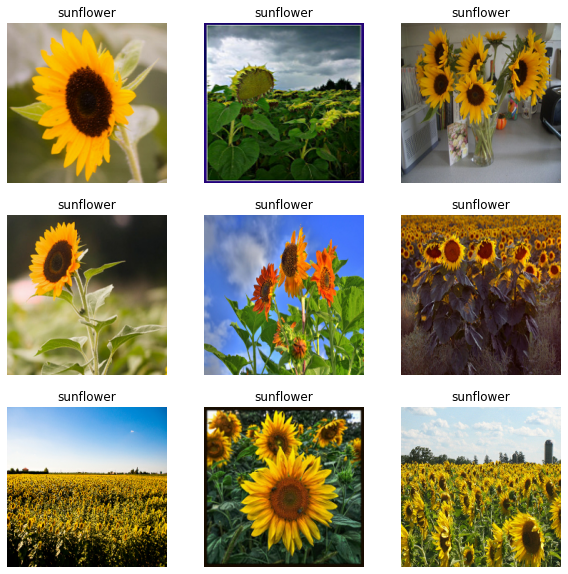

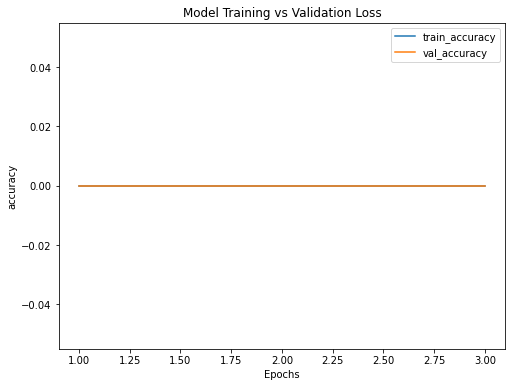

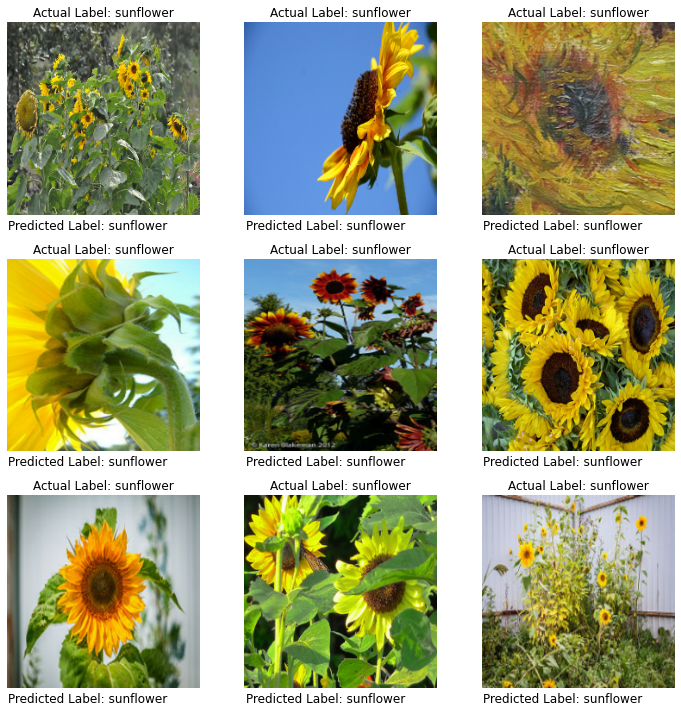

In [15]:
model, dicti = deepauto.fit("", target, keras_model_type=keras_model_type, project_name='flowers',
                 save_model_flag=True, model_options=model_options,model_use_case='',keras_options=keras_options, use_my_model='', verbose=0)

### Birds

In [17]:
!kaggle datasets download 'gpiosenka/100-bird-species'
!unzip 100-bird-species.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/TURKEY VULTURE/117.jpg  
  inflating: train/TURKEY VULTURE/118.jpg  
  inflating: train/TURKEY VULTURE/120.jpg  
  inflating: train/TURKEY VULTURE/121.jpg  
  inflating: train/TURKEY VULTURE/122.jpg  
  inflating: train/TURKEY VULTURE/124.jpg  
  inflating: train/TURKEY VULTURE/125.jpg  
  inflating: train/TURKEY VULTURE/126.jpg  
  inflating: train/TURKEY VULTURE/127.jpg  
  inflating: train/TURKEY VULTURE/128.jpg  
  inflating: train/TURKEY VULTURE/129.jpg  
  inflating: train/TURKEY VULTURE/130.jpg  
  inflating: train/TURKEY VULTURE/131.jpg  
  inflating: train/TURKEY VULTURE/132.jpg  
  inflating: train/TURKEY VULTURE/133.jpg  
  inflating: train/TURKEY VULTURE/134.jpg  
  inflating: train/TURKEY VULTURE/135.jpg  
  inflating: train/TURKEY VULTURE/136.jpg  
  inflating: train/TURKEY VULTURE/137.jpg  
  inflating: train/TURKEY VULTURE/138.jpg  
  inflating: train/TURKEY VULTURE/139.jpg  
  inflating: train/TURKEY

In [9]:
from deep_autoviml import deep_autoviml as deepauto
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf


Imported deep_auto_viml. version=0.0.67
from deep_autoviml import deep_autoviml as deepauto
-------------------
model, cat_vocab_dict = deepauto.fit(train, target, keras_model_type="fast",
		project_name="deep_autoviml", keras_options=keras_options,  
		model_options=model_options, save_model_flag=True, use_my_model='',
		model_use_case='', verbose=0)

predictions = deepauto.predict(model, project_name, test_dataset=test,
                                 keras_model_type=keras_model_type, 
                                 cat_vocab_dict=cat_vocab_dict)
                                


In [10]:
BATCHSIZE = 256
CLASSES = 10
EPOCHS = 25
NUM_TRIALS = 5

In [6]:
target = 'image'
datapath = '/content/'

In [36]:
!mkdir /content/drive/MyDrive/train

In [37]:
!cp -r /content/train/ALBATROSS /content/drive/MyDrive/train

In [2]:
!cp -r /content/drive/MyDrive/train /content/train

In [11]:
from PIL import Image
img = Image.open('/content/train/ALBATROSS/001.jpg')

In [12]:
height = 224
width = 224
img_channels = 3

In [13]:
keras_model_type =  "image" ## always try "auto" first, then "basic", "deep", "big deep", "giant deep", "cnn1" etc.
keras_options = {"early_stopping": True, 'lr_scheduler': 'rlr', "epochs": 3}  ### always set early_stopping to True first and then change it to False
model_options = {'tuner':"optuna", "max_trials":10, 'cat_feat_cross_flag':True, 
                 'image_directory': datapath, 'image_height': height, 
                 'image_width':width, 'image_channels':img_channels }
## always set the tuner to "storm" first and then "optuna"
#### You always need 15 max_trials to get something decent #####

Num GPUs Available:  1
1 Physical GPUs, 1 Logical GPU
Physical devices cannot be modified after being initialized
Setting Mirrored GPU strategy using 1 devices
    Image directory given as /content/
For image use case:
    Image height given as 224
    Image width given as 224
    Image channels given as 3
No validation folder found under given image directory /content/. Returning...
Found 133 files belonging to 1 classes.

Splitting train into two: train and validation data
Number of image classes = 1 and they are: ['ALBATROSS']
Training image model. This will take time...
Epoch 1/3
1/1 [==============================] - 37s 37s/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/3
1/1 [==============================] - 0s 432ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 3/3
1/1 [==============================] - 0s 269ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00
    M

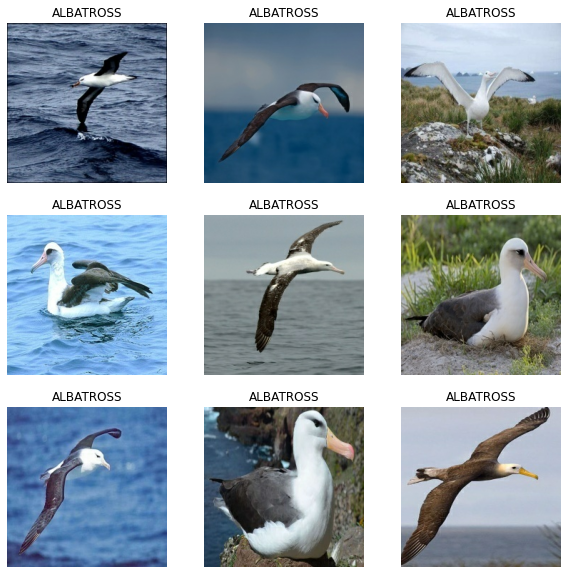

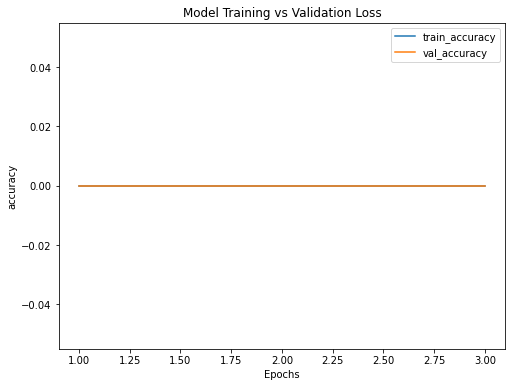

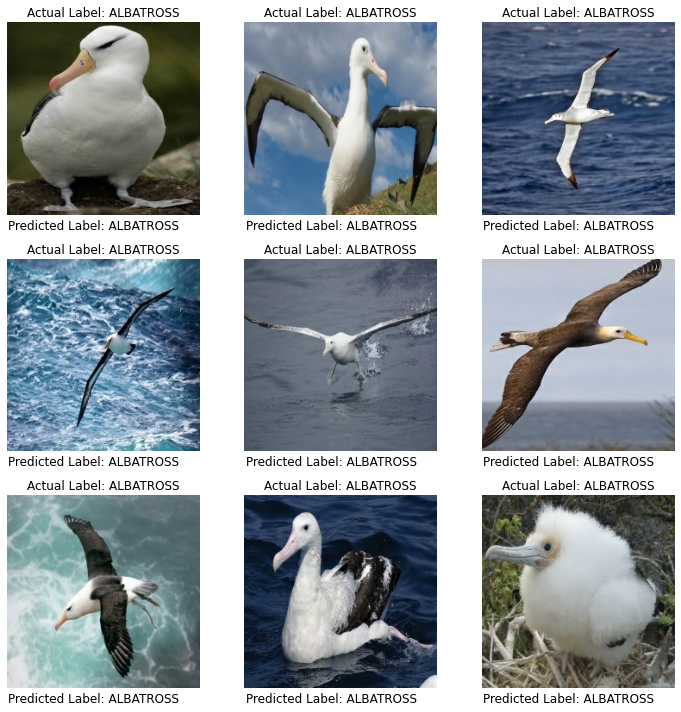

In [14]:
model, dicti = deepauto.fit("", target, keras_model_type=keras_model_type, project_name='birds',
                 save_model_flag=False, model_options=model_options,model_use_case='',keras_options=keras_options, use_my_model='', verbose=0)

### 3. Cars And Albatross Birds


In [15]:
from deep_autoviml import deep_autoviml as deepauto
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

In [16]:
BATCHSIZE = 256
CLASSES = 10
EPOCHS = 25
NUM_TRIALS = 5

In [17]:
target = 'image'
datapath = '/content/'

In [47]:
!mkdir /content/train

mkdir: cannot create directory ‘/content/train’: File exists


In [18]:
!cp -r /content/drive/MyDrive/cmpe-297-SOTA/data/car  /content/train/car

In [50]:
from PIL import Image
img = Image.open('/content/train/car/car0.jpg')

In [19]:
height = 224
width = 224
img_channels = 3

In [20]:
keras_model_type =  "image" ## always try "auto" first, then "basic", "deep", "big deep", "giant deep", "cnn1" etc.
keras_options = {"early_stopping": True, 'lr_scheduler': 'rlr', "epochs": 3}  ### always set early_stopping to True first and then change it to False
model_options = {'tuner':"optuna", "max_trials":10, 'cat_feat_cross_flag':True, 
                 'image_directory': datapath, 'image_height': height, 
                 'image_width':width, 'image_channels':img_channels }
## always set the tuner to "storm" first and then "optuna"
#### You always need 15 max_trials to get something decent #####

Num GPUs Available:  1
1 Physical GPUs, 1 Logical GPU
Physical devices cannot be modified after being initialized
Setting Mirrored GPU strategy using 1 devices
    Image directory given as /content/
For image use case:
    Image height given as 224
    Image width given as 224
    Image channels given as 3
No validation folder found under given image directory /content/. Returning...
Found 283 files belonging to 2 classes.

Splitting train into two: train and validation data
Number of image classes = 2 and they are: ['ALBATROSS', 'car']
Training image model. This will take time...
Epoch 1/3
2/2 [==============================] - 10s 3s/step - loss: nan - accuracy: 0.5156 - val_loss: nan - val_accuracy: 0.4844
Epoch 2/3
2/2 [==============================] - 1s 428ms/step - loss: nan - accuracy: 0.5312 - val_loss: nan - val_accuracy: 0.4844
Epoch 3/3
1/1 [==============================] - 0s 283ms/step - loss: nan - accuracy: 0.4844
    Model accuracy in Image validation data: 0.484375


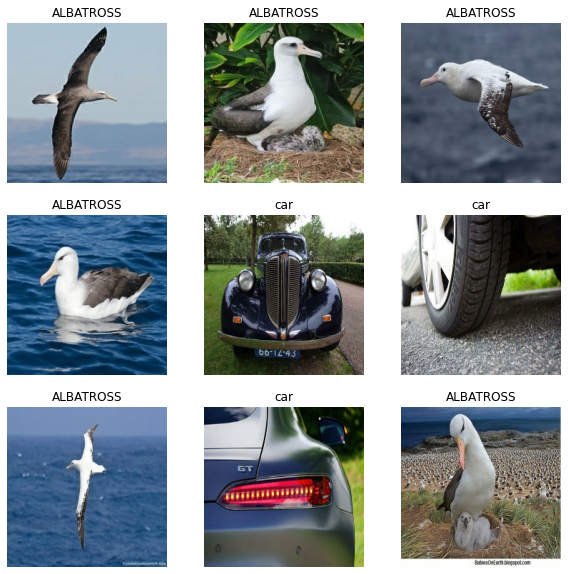

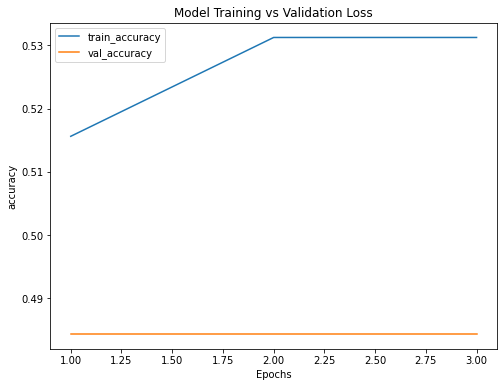

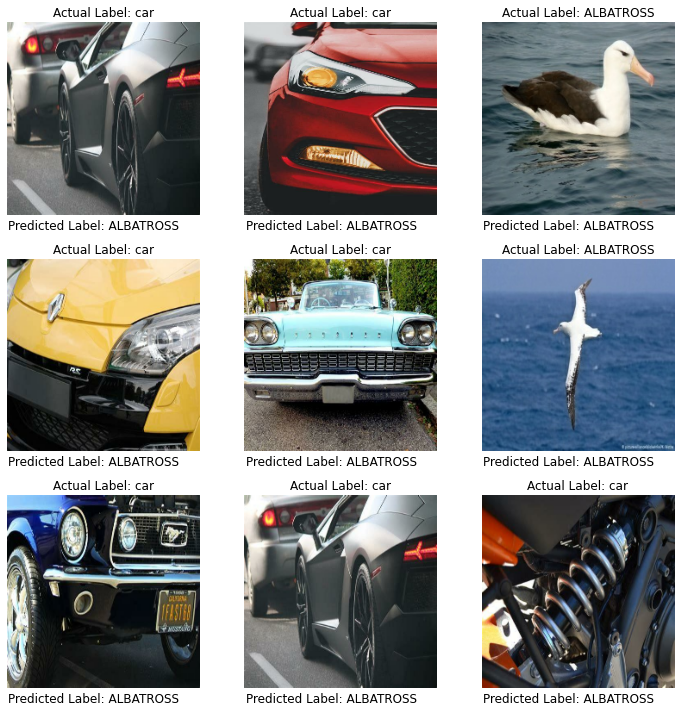

In [22]:
model, dicti = deepauto.fit("", target, keras_model_type=keras_model_type, project_name='cars and ALBATROSS',
                 save_model_flag=False, model_options=model_options,model_use_case='',keras_options=keras_options, use_my_model='', verbose=0)